# Name : **Tanishta** **Varman**
# School :**SCDS**
# Email ID : *tanishta.m-26@scds.saiuniversity.edu.in*

##Importing requried libraries

some of the code is used from the website : https://keras.io/api/applications/inceptionv3/

In [1]:
import os
import time
import pathlib
import glob
import PIL
from PIL import Image , ImageEnhance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense , Dropout , BatchNormalization

#Dataset Details
- we have a file with 519 pictures
- we have 7 subclasses with each having respective number of pictures [86,42,79,72,91,64,85]
- we will train 75% and test on 25% with 10% for validation

# Import Dataset

In [2]:
from google.colab import drive
import os
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_class=os.listdir('/content/drive/MyDrive/Dl_project /data file')
number_class=len(data_class)
print("The number of classes the cats are sorted ",number_class)
print("The name of each type of cat ",data_class)

The number of classes the cats are sorted  7
The name of each type of cat  ['jungle-cat', 'domestic-cat', 'chinese-mountain-cat', 'european-wildcat', 'african-wildcat', 'sand-cat', 'blackfoot-cat']


# Sort Dataset with labels

In [4]:
path_of_file=[] # has all the images and their paths
file_label=[] #has the type or class of cat and its location
img_count=[] # count_images_class # number of images in each type or class
final_count=0 # total number of images

for index, nameofclass in enumerate(data_class):
  class_count=0
  file=os.path.join("/content/drive/MyDrive/Dl_project /data file", nameofclass)
  fileofclass=os.listdir(file)
  for i in fileofclass:
    path_of_file.append(os.path.join(file,i))
    final_count +=1
    class_count +=1
    file_label.append(nameofclass)
  img_count.append(class_count)





In [5]:
print("Total number of images ",final_count)
print("Number of images in each type of cat",img_count)

Total number of images  519
Number of images in each type of cat [86, 64, 42, 85, 91, 72, 79]


#### now we process the images we have since we cannot use them as it is

In [6]:
ex=[]
for i in path_of_file:
  j=Image.open(i)
  j=j.resize((299,299))
  j=np.array(j)/255 # we are making range to 0 to 1.0 we only scale we dont try to stretch the image
  ex.append(j)

from sklearn.preprocessing import LabelEncoder
end=LabelEncoder()
y=end.fit_transform(file_label)
print(set(y))
print(end.classes_)
ex=np.array(ex)
y=np.array(y)
print(ex.shape)
print(y.shape)


{0, 1, 2, 3, 4, 5, 6}
['african-wildcat' 'blackfoot-cat' 'chinese-mountain-cat' 'domestic-cat'
 'european-wildcat' 'jungle-cat' 'sand-cat']
(519, 299, 299, 3)
(519,)


#Now we split the dataset for training and testing

> Add blockquote




## Transfer Learning

In [7]:
x_train,x_test,y_train,y_test=train_test_split(ex,y,test_size=0.25,random_state=42,stratify=y)
# we use stratify cause the types on the data set are not balanced some has more and some has less images
print("shape of x_train {}".format(x_train.shape))
print("shape of x_test{} ".format(x_test.shape))
print(len(x_train))
print(len(x_test))
print("shape of y_train {}".format(y_train.shape))
print("shape of y_test{} ".format(y_test.shape))
print(len(y_train))
print(len(y_test))

shape of x_train (389, 299, 299, 3)
shape of x_test(130, 299, 299, 3) 
389
130
shape of y_train (389,)
shape of y_test(130,) 
389
130


now we standardise the data sets

Then after that we do Transfer Learning

In [8]:
mean_x=x_train.mean()
std=x_train.std()
x_train_std=(x_train - mean_x) / std
x_test_std=(x_test - mean_x) / std

# Now we use the transfer learning
base = keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    name="inception_v3",
)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


we can not make changes to the acquried model .


we do this so not all weights are used and updated during backpropagation

In [9]:
for i in base.layers:
  i.trainabe=False

# Add Classifier

In [10]:
# we will do global average pooling
gp=keras.layers.GlobalAveragePooling2D()(base.output)
x= BatchNormalization()(gp)
x = Dropout(0.25)(x)
op=keras.layers.Dense(units=7, activation='softmax')(x)
tl_model=keras.models.Model(inputs=[base.input],outputs=[op])


tl_model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy', metrics=['accuracy'])
tl_calback=[ keras.callbacks.ModelCheckpoint('bestTL.weights.h5', monitor='val_accuracy', save_best_only=True, save_weights_only=True)]

tl_hist=tl_model.fit(x= x_train_std , y=y_train , validation_split=0.1, batch_size=32,epochs=10 , callbacks=tl_calback)



Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 179s 8s/step - accuracy: 0.4283 - loss: 2.9010 - val_accuracy: 0.0513 - val_loss: 4.6046
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 61s 420ms/step - accuracy: 0.6715 - loss: 1.2625 - val_accuracy: 0.0513 - val_loss: 6.1488
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 610ms/step - accuracy: 0.8238 - loss: 0.6231 - val_accuracy: 0.2051 - val_loss: 4.0227
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 424ms/step - accuracy: 0.8680 - loss: 0.4730 - val_accuracy: 0.1282 - val_loss: 2.0428
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 443ms/step - accuracy: 0.9281 - loss: 0.2069 - val_accuracy: 0.1538 - val_loss: 2.4102
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 543ms/step - accuracy: 0.9533 - loss: 0.1705 - val_accuracy: 0.3590 - val_loss: 5.0203
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 439ms/step - accuracy: 0.9623 - loss: 0.1602 - val_accuracy: 0.1795 - val_loss: 1576.0776
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 434ms/step - accuracy: 0.9708 - loss: 0.0761 - val_accuracy:

# Graph

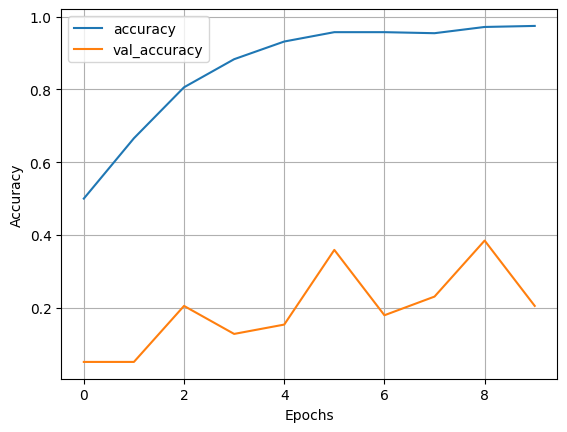

In [11]:
keys=['accuracy' , 'val_accuracy']
progress = { k:v for k , v in tl_hist.history.items() if k in keys}
import pandas as pd
pd.DataFrame(progress).plot()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Saving the best models in a file called Models_1_TL


## Loss percentage of the models and models Accuracy

In [12]:
testloss_tl , testaccuracy_tl = tl_model.evaluate(x=x_test_std , y=y_test)
print("Test-Loss : %f , Test -Accuracy : %f " % (testloss_tl,testaccuracy_tl))




5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.2714 - loss: 1.9253
Test-Loss : 1.984086 , Test -Accuracy : 0.230769 


In [13]:
tl_model.load_weights("bestTL.weights.h5")
testlostt_tl , testaccuracy_tl =tl_model.evaluate(x=x_test_std, y=y_test)
print("Test-Loss : %f , Test -Accuracy : %f " % (testloss_tl,testaccuracy_tl))
tl_model.save('/content/drive/MyDrive/Models_1_TL/01_InceptionV3_TransferLearning_Best_Model.h5')

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.2406 - loss: 19.0289 


Test-Loss : 1.984086 , Test -Accuracy : 0.215385 


In [14]:
from numpy import save
save ('/content/drive/MyDrive/Models_1_TL/X_train_std.npy' , x_train_std)
save( '/content/drive/MyDrive/Models_1_TL/X_test_std.npy' , x_test_std)
save('/content/drive/MyDrive/Models_1_TL/y_train.npy', y_train)
save('/content/drive/MyDrive/Models_1_TL/y_test.npy', y_test)